In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [32]:
from sklearn.model_selection import train_test_split

# Split data into 90% train and 10% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.1, shuffle=False
)

In [33]:
X_train.shape, y_train.shape

((63000, 784), (63000,))

In [199]:
%matplotlib inline

def plot_digits(X_, y_, num_figs, y_caption='True label'):

    from matplotlib.pyplot import figure
    from numpy import ceil

    num_rows = ceil(num_figs/5).astype(int)

    fig = figure(figsize=(20, 4.8*num_rows))

    for j, ((i, img), (i, lab)) in enumerate(zip(X_.iterrows(), y_.iteritems())):

        tf = fig.add_subplot(num_rows, 5, j+1)
        tf.matshow(img.values.reshape((28, -1)), cmap='gray')
        tf.set_title('%s: %s\n' % (y_caption, lab), fontsize = 20)

        if j+1 == num_figs: break

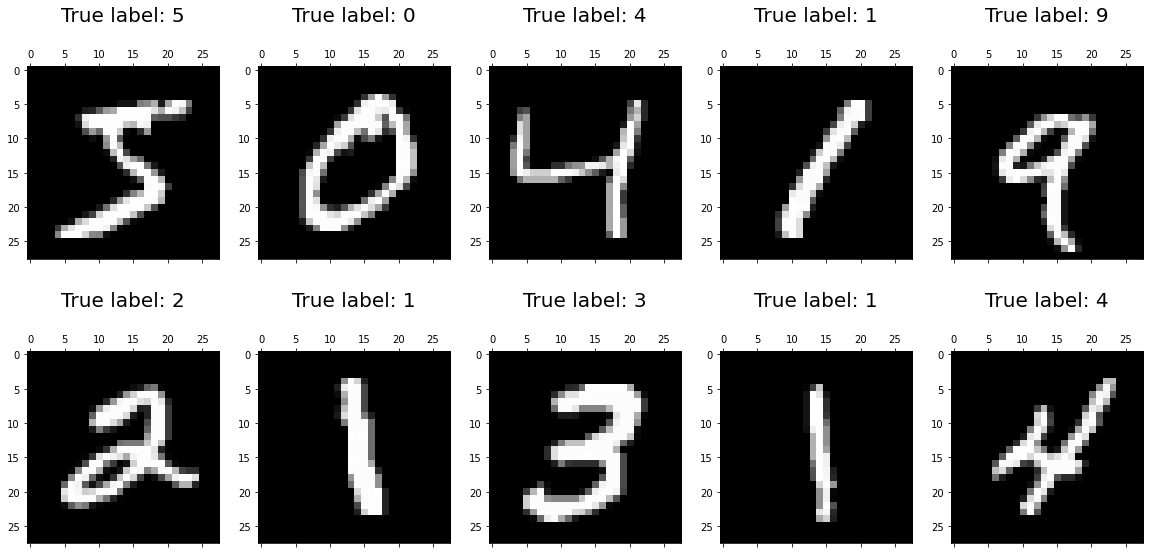

In [315]:
plot_digits(X_train, y_train, 10)

In [84]:
yhat_test = dict()

In [88]:
from sklearn.ensemble import RandomForestClassifier

# module loading
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

yhat_test['RandomForest'] = clf.predict(X_test)

print((yhat_test['RandomForest'] == y_test).mean())

0.9752857142857143


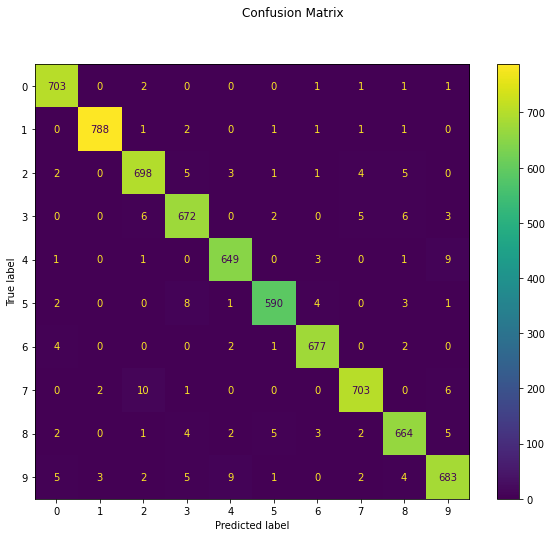

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, yhat_test['RandomForest'])
disp.figure_.suptitle("Confusion Matrix")
disp.figure_.set_size_inches((10, 8));

In [97]:
from sklearn.linear_model import LogisticRegression

cll = LogisticRegression(C=0.01, penalty="l1", solver="saga", tol=0.1)

cll.fit(X_train, y_train)

yhat_test['LogisticRegression'] = cll.predict(X_test)

print((yhat_test['LogisticRegression']==y_test).mean())

0.935


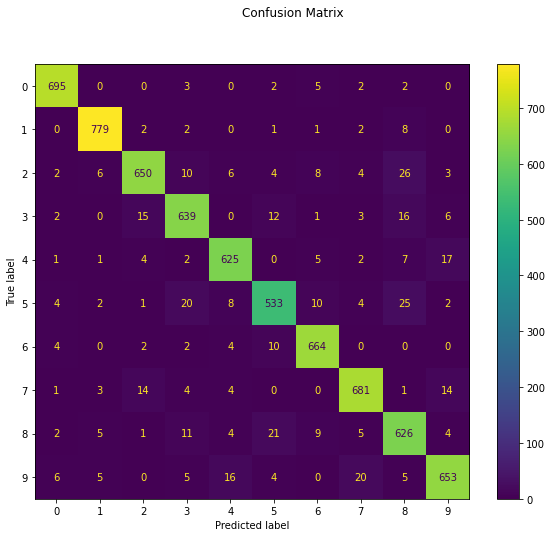

In [98]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, yhat_test['LogisticRegression'])
disp.figure_.suptitle("Confusion Matrix")
disp.figure_.set_size_inches((10, 8));

In [295]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
estimator = make_pipeline(kmeans).fit(X_test)
grp_test = pd.Series(estimator[-1].labels_.astype('str'), dtype='category')
# grp_test = grp_test.cat.rename_categories([ 'cluster '+one for one in grp_test.cat.categories.values])

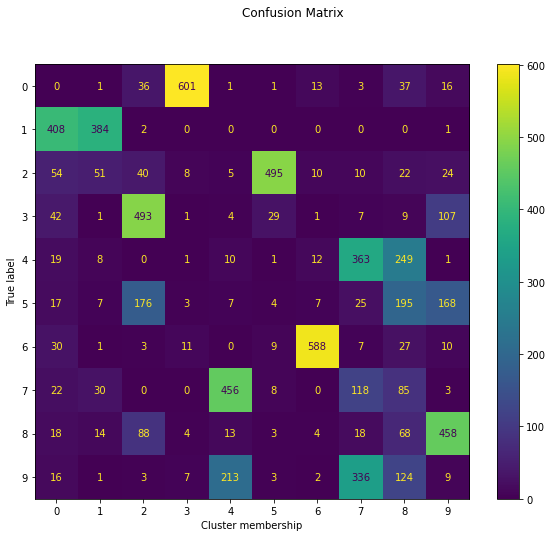

In [296]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, grp_test)
disp.figure_.suptitle("Confusion Matrix")
disp.figure_.set_size_inches((10, 8))
disp.ax_.set_xlabel('Cluster membership');

In [252]:
import numpy as np

cluster_label = dict()
for one in np.unique(grp_test):
    majority = y_test[(grp_test==one).values].value_counts()
    print('Majority of points in cluster', one, 'have label', majority.idxmax())
    cluster_label[str(one)] = majority.idxmax()

Majority of points in cluster 0 have label 1
Majority of points in cluster 1 have label 1
Majority of points in cluster 2 have label 3
Majority of points in cluster 3 have label 0
Majority of points in cluster 4 have label 7
Majority of points in cluster 5 have label 2
Majority of points in cluster 6 have label 6
Majority of points in cluster 7 have label 4
Majority of points in cluster 8 have label 4
Majority of points in cluster 9 have label 8


In [298]:
def subset_images(data, true_labels, cluster_assignment, digit, cluster):

    cond = (cluster_assignment == cluster).values & (true_labels == digit).values

    return data[cond], true_labels[cond], cluster_assignment[cond]


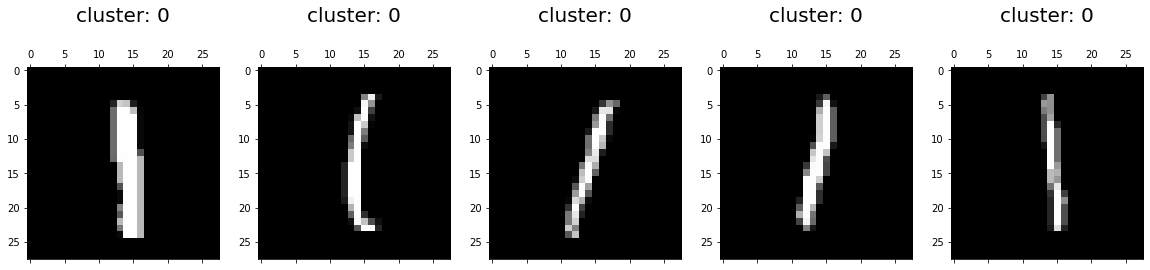

In [310]:
# upright
d, l, c = subset_images(X_test, y_test, grp_test, '1', '0')
plot_digits(d, c, 5, 'cluster')

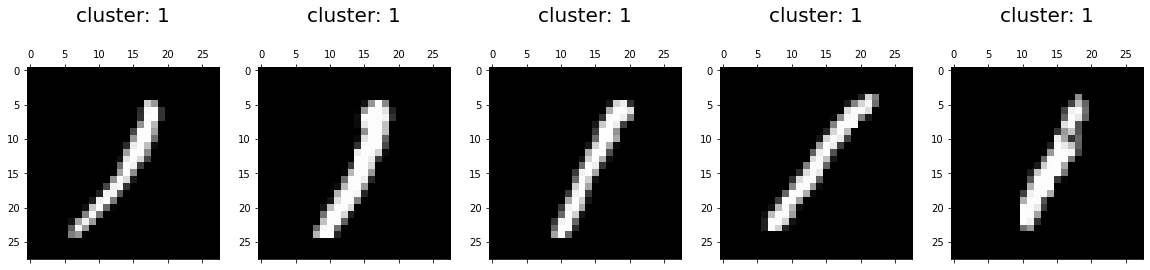

In [311]:
# slanted
d, l, c = subset_images(X_test, y_test, grp_test, '1', '1')
plot_digits(d, c, 5, 'cluster')

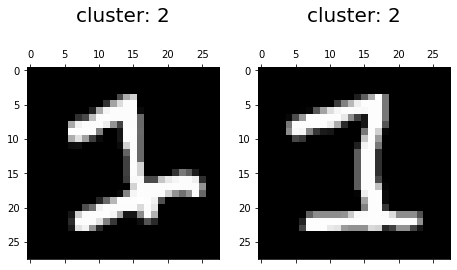

In [313]:
# fancy
d, l, c = subset_images(X_test, y_test, grp_test, '1', '2')
plot_digits(d, c, 5, 'cluster')

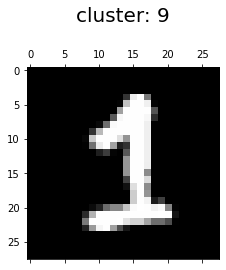

In [314]:
# fancy upright
d, l, c = subset_images(X_test, y_test, grp_test, '1', '9')
plot_digits(d, c, 5, 'cluster')